In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Book1.csv')
df.head()

,Date,Price USD per Oz,Price INR per Gm
0,2009-01,857.726,2264.618110
1,2009-02,939.763,2481.216972
2,2009-03,925.989,2444.850056
3,2009-04,892.663,2356.860811
4,2009-05,926.855,2447.136519


In [3]:
df.shape

(139, 3)

In [4]:
df.isnull().sum()

Date                0
Price USD per Oz    0
Price INR per Gm    0
dtype: int64

In [5]:
df['Date']=pd.to_datetime(df['Date'])

In [6]:
df.head()

,Date,Price USD per Oz,Price INR per Gm
0,2009-01-01,857.726,2264.618110
1,2009-02-01,939.763,2481.216972
2,2009-03-01,925.989,2444.850056
3,2009-04-01,892.663,2356.860811
4,2009-05-01,926.855,2447.136519


In [7]:
df.drop(['Price USD per Oz'],axis=1,inplace=True)

In [8]:
df.rename(columns={'Price INR per Gm':'price'})
df.head()

,Date,Price INR per Gm
0,2009-01-01,2264.618110
1,2009-02-01,2481.216972
2,2009-03-01,2444.850056
3,2009-04-01,2356.860811
4,2009-05-01,2447.136519


In [9]:
df.set_index('Date',inplace=True)

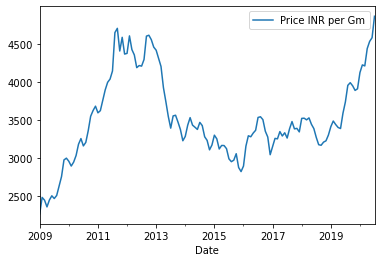

In [10]:
df.plot()

In [11]:
df.head()

,Price INR per Gm
Date,
2009-01-01,2264.618110
2009-02-01,2481.216972
2009-03-01,2444.850056
2009-04-01,2356.860811
2009-05-01,2447.136519


In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
test_result=adfuller(df['Price INR per Gm'])
test_result

(-1.5521362657931976,
 0.5075809297397111,
 5,
 133,
 {'1%': -3.480500383888377,
  '5%': -2.8835279559405045,
  '10%': -2.578495716547007},
 1545.212470865353)

In [14]:
def adfuller_test(price):
    result=adfuller(price)
    labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for i,j in zip(result,labels):
        print(j+':'+str(i))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [15]:
adfuller_test(df['Price INR per Gm'])

ADF Test Statistic:-1.5521362657931976
p-value:0.5075809297397111
#Lags Used:5
Number of Observations Used:133
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [16]:
df['Price_first_difference']=df['Price INR per Gm']-df['Price INR per Gm'].shift(1)

In [17]:
df['Price INR per Gm'].shift(1)

Date
2009-01-01            NaN
2009-02-01    2264.618110
2009-03-01    2481.216972
2009-04-01    2444.850056
2009-05-01    2356.860811
                 ...     
2020-03-01    4221.292344
2020-04-01    4207.948479
2020-05-01    4435.712993
2020-06-01    4529.883083
2020-07-01    4578.292217
Name: Price INR per Gm, Length: 139, dtype: float64

In [18]:
df['Seasonal_first_differnce']=df['Price INR per Gm']-df['Price INR per Gm'].shift(12)
df.head()

,Price INR per Gm,Price_first_difference,Seasonal_first_differnce
Date,,,
2009-01-01,2264.618110,NaN,NaN
2009-02-01,2481.216972,216.598862,NaN
2009-03-01,2444.850056,-36.366916,NaN
2009-04-01,2356.860811,-87.989245,NaN
2009-05-01,2447.136519,90.275708,NaN


In [19]:
adfuller_test(df['Price_first_difference'].dropna())

ADF Test Statistic:-3.682772831796605
p-value:0.004362099347449027
#Lags Used:4
Number of Observations Used:133
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [20]:
adfuller_test(df['Seasonal_first_differnce'].dropna())

ADF Test Statistic:-1.267939034706784
p-value:0.643709670186713
#Lags Used:13
Number of Observations Used:113
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


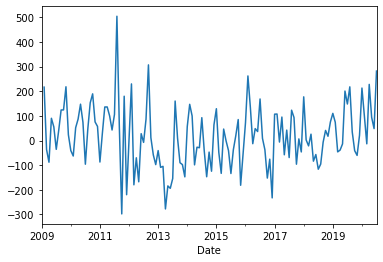

In [21]:
df['Price_first_difference'].plot()

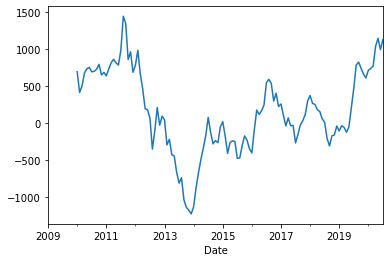

In [22]:
df['Seasonal_first_differnce'].plot()

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

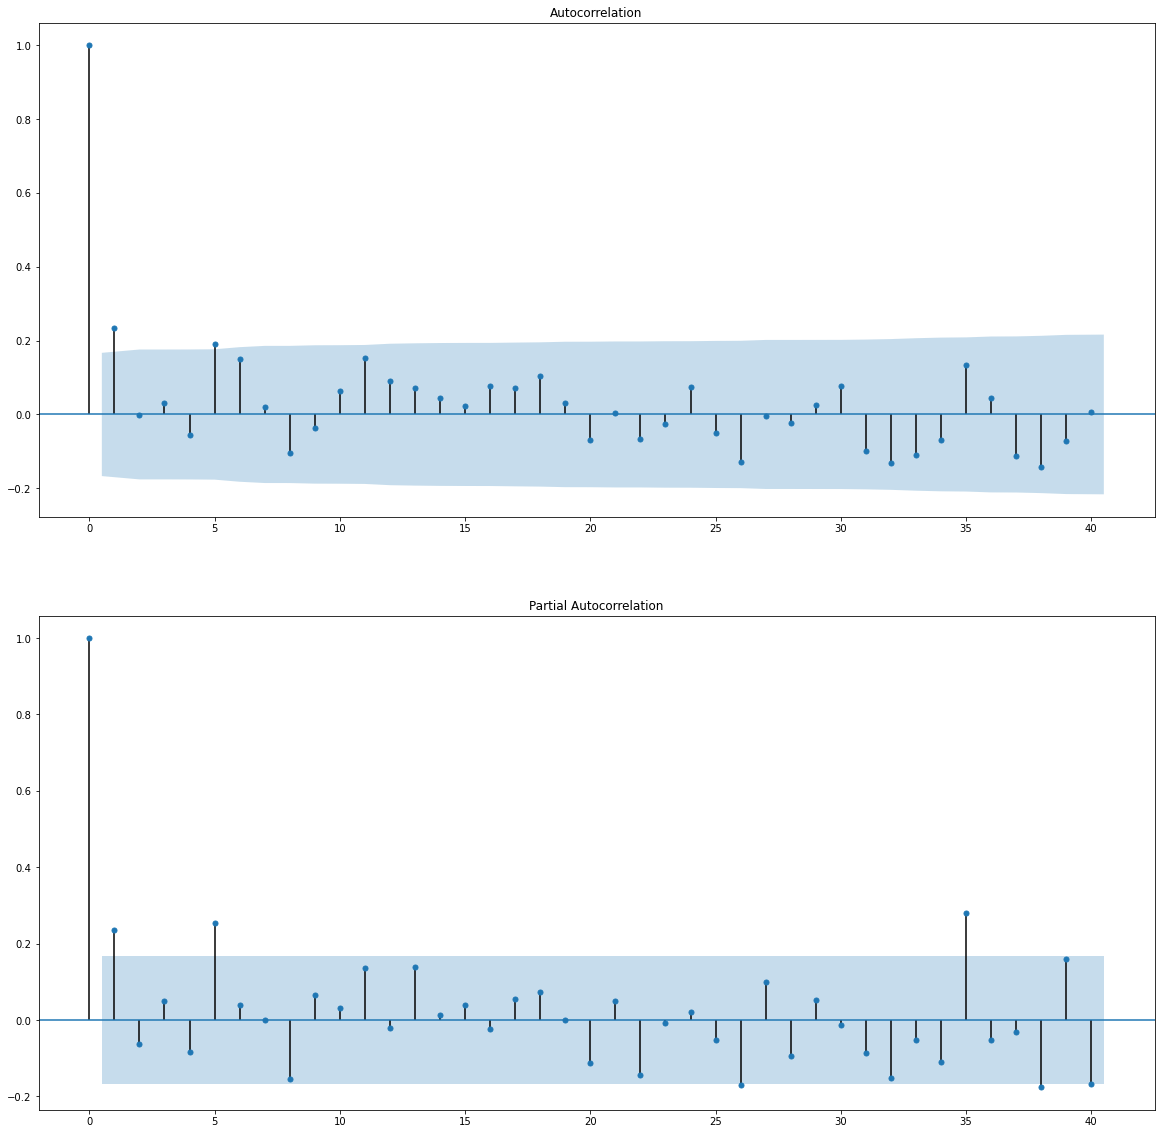

In [24]:
fig=plt.figure(figsize=(20,20))
ax1=fig.add_subplot(211)
fig= sm.graphics.tsa.plot_acf(df['Price_first_difference'].iloc[1:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig= sm.graphics.tsa.plot_pacf(df['Price_first_difference'].iloc[1:],lags=40,ax=ax2)

In [25]:
df.head()

,Price INR per Gm,Price_first_difference,Seasonal_first_differnce
Date,,,
2009-01-01,2264.618110,NaN,NaN
2009-02-01,2481.216972,216.598862,NaN
2009-03-01,2444.850056,-36.366916,NaN
2009-04-01,2356.860811,-87.989245,NaN
2009-05-01,2447.136519,90.275708,NaN


In [26]:
from statsmodels.tsa.arima_model import ARIMA

In [31]:
model=ARIMA(df['Price_first_difference'],order=(1,1,1))
model_fit=model.fit()
print(model_fit.aic)

1712.5246314337537


C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [32]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARIMA Model Results                                 
====================================================================================
Dep. Variable:     D.Price_first_difference   No. Observations:                  137
Model:                       ARIMA(1, 1, 1)   Log Likelihood                -852.262
Method:                             css-mle   S.D. of innovations            120.961
Date:                      Mon, 11 Jan 2021   AIC                           1712.525
Time:                              12:25:52   BIC                           1724.205
Sample:                          03-01-2009   HQIC                          1717.271
                               - 07-01-2020                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1501      0.888      0.169      0.866      -1.591       1.891
ar.L1.D.Price_first_difference     0.1967      0.093      2.110      0.035       0.014       0.379
ma.L1.D.Price_first_difference    -0.9397      0.037    -25.564      0.000      -1.012      -0.868
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            5.0844           +0.0000j            5.0844            0.0000
MA.1            1.0641           +0.0000j            1.0641            0.0000
-----------------------------------------------------------------------------
"""

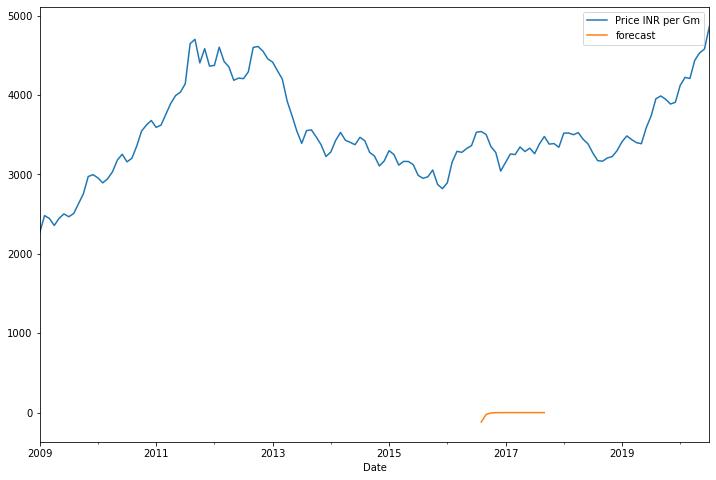

In [33]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Price INR per Gm','forecast']].plot(figsize=(12,8))

In [35]:
import statsmodels.api as sm

In [36]:
model=sm.tsa.statespace.SARIMAX(df['Price INR per Gm'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


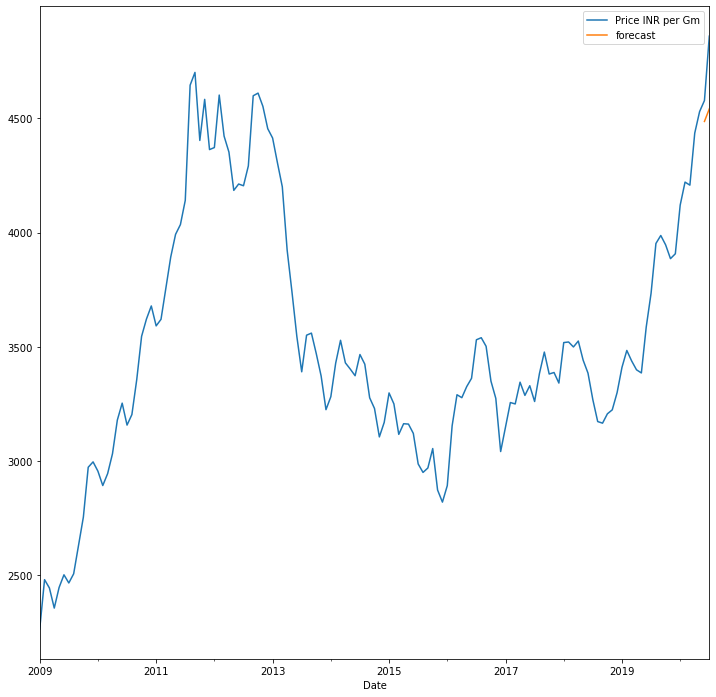

In [37]:
df['forecast']=results.predict(start=137,end=150,dynamic=True)
df[['Price INR per Gm','forecast']].plot(figsize=(12,12))

In [51]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_dates

[Timestamp('2020-06-01 00:00:00'),
 Timestamp('2020-07-01 00:00:00'),
 Timestamp('2020-08-01 00:00:00'),
 Timestamp('2020-09-01 00:00:00'),
 Timestamp('2020-10-01 00:00:00'),
 Timestamp('2020-11-01 00:00:00'),
 Timestamp('2020-12-01 00:00:00'),
 Timestamp('2021-01-01 00:00:00'),
 Timestamp('2021-02-01 00:00:00'),
 Timestamp('2021-03-01 00:00:00'),
 Timestamp('2021-04-01 00:00:00'),
 Timestamp('2021-05-01 00:00:00'),
 Timestamp('2021-06-01 00:00:00'),
 Timestamp('2021-07-01 00:00:00'),
 Timestamp('2021-08-01 00:00:00'),
 Timestamp('2021-09-01 00:00:00'),
 Timestamp('2021-10-01 00:00:00'),
 Timestamp('2021-11-01 00:00:00'),
 Timestamp('2021-12-01 00:00:00'),
 Timestamp('2022-01-01 00:00:00'),
 Timestamp('2022-02-01 00:00:00'),
 Timestamp('2022-03-01 00:00:00'),
 Timestamp('2022-04-01 00:00:00'),
 Timestamp('2022-05-01 00:00:00')]

In [52]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [53]:
future_datest_df.tail()

,Price INR per Gm,Price_first_difference,Seasonal_first_differnce,forecast
2022-01-01,NaN,NaN,NaN,NaN
2022-02-01,NaN,NaN,NaN,NaN
2022-03-01,NaN,NaN,NaN,NaN
2022-04-01,NaN,NaN,NaN,NaN
2022-05-01,NaN,NaN,NaN,NaN


In [54]:
future_df=pd.concat([df,future_datest_df])

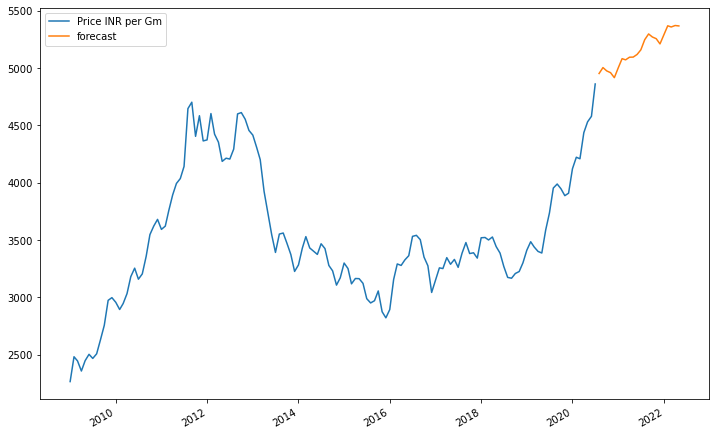

In [55]:
future_df['forecast'] = results.predict(start = 139, end = 160, dynamic= True)  
future_df[['Price INR per Gm', 'forecast']].plot(figsize=(12, 8)) 

In [43]:
future_df.tail(30)

,Price INR per Gm,Price_first_difference,Seasonal_first_differnce,forecast
2020-01-01,4120.566493,212.918342,710.329787,NaN
2020-02-01,4221.292344,100.725851,736.798376,NaN
2020-03-01,4207.948479,-13.343865,769.577181,NaN
2020-04-01,4435.712993,227.764514,1035.984515,NaN
2020-05-01,4529.883083,94.170090,1143.857545,NaN
2020-06-01,4578.292217,48.409134,991.533128,NaN
2020-07-01,4860.205787,281.913570,1125.267487,NaN
2020-08-01,NaN,NaN,NaN,4951.660247
2020-09-01,NaN,NaN,NaN,5003.290975
2020-10-01,NaN,NaN,NaN,4974.389183


In [45]:
df.index[-1]

Timestamp('2020-07-01 00:00:00')

In [46]:
df

,Price INR per Gm,Price_first_difference,Seasonal_first_differnce,forecast
Date,,,,
2009-01-01,2264.618110,NaN,NaN,NaN
2009-02-01,2481.216972,216.598862,NaN,NaN
2009-03-01,2444.850056,-36.366916,NaN,NaN
2009-04-01,2356.860811,-87.989245,NaN,NaN
2009-05-01,2447.136519,90.275708,NaN,NaN
...,...,...,...,...
2020-03-01,4207.948479,-13.343865,769.577181,NaN
2020-04-01,4435.712993,227.764514,1035.984515,NaN
2020-05-01,4529.883083,94.170090,1143.857545,NaN


In [50]:
from pandas.tseries.offsets import DateOffset
fu=[df.index[-1]+ DateOffset(months=x)for x in range(0,5)]
fu

[Timestamp('2020-07-01 00:00:00'),
 Timestamp('2020-08-01 00:00:00'),
 Timestamp('2020-09-01 00:00:00'),
 Timestamp('2020-10-01 00:00:00'),
 Timestamp('2020-11-01 00:00:00')]